# Support Vector Machine

- 기수: 12기

- 이름: 복지민

- 작성자: 11기 김정우 ; 12기 이정우

본 과제 문제에서는 간단한 SVM 실습을 Support Vector Machine의 개념과 Kernel SVM과 Naive SVM의 차이에 대해 이해하는 것을 목표로 합니다.

### 01. Setting

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn import datasets # to use iris dataset from scikit-learn.datasets

In [2]:
iris = datasets.load_iris()

In [3]:
# Use pandas dataframe for visualization
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

print(iris_df.shape)
iris_df.head(-1)

(150, 5)


sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
144                6.7               3.3                5.7               2.5   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   

     target  
0         0  
1         0  
2         0  
3         0  
4         0  
..      ...  
144       2  
145       2  
146       2  
147       2  
148       2  

[149 rows x 5 columns]

In [4]:
iris_df.shape

(150, 5)

In [5]:
X = iris.data[:, [0, 2]]  # use only sepal length and petal length
y = iris.target

# Binary Classification Task (setosa or not)
y = np.where(y == 0, 0, 1)

In [6]:
print("Data Shape:", X.shape)

Data Shape: (150, 2)


### 02. Naive SVM

**2-4**

**TO DO**

2-3의 결과를 이용해서, (??????)의 빈칸을 채운 후, 간단한 SVM을 직접 구현해봅시다! (편의를 위해 Sepal Length와 Petal Length 2개의 변수만을 이용해 Setosa 여부를 판단하는 Binary Classification 문제로 간주합니다.)


In [38]:
class SimpleSVM:
    def __init__(self, learning_rate=0.001, C=0.0, n_iters=1000):
        self.learning_rate = learning_rate  # 학습률
        self.C = C                          # margin과 training error에 대한 trade-off를 결정하는 하이퍼파라미터
        self.n_iters = n_iters              # 반복 횟수
        self.w = None                       # 가중치 벡터
        self.b = None                       # 편향 값

    def fit(self, X, y):
        n_features = X.shape[1]
        y_ = y * 2 - 1  # 라벨을 -1, 1로 변환

        # 가중치와 편향 초기화
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = (y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1).all()
                if condition:
                    self.w = self.w - self.learning_rate * (2 * self.C * self.w)
                else:
                    self.w = self.w - self.learning_rate * (2 * self.C * self.w - np.dot(x_i, y_[idx]))
                    self.b = self.b - self.learning_rate * self.C * y_[idx]

    def predict(self, X):
        approx = np.dot(X,self.w) - self.b
        predictions = np.sign(approx)
        return np.where(predictions == -1, 0, 1)

In [39]:
# Train/Test set split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

C는 margin과 training error에 대한 trade-off를 결정하는 하이퍼파라미터입니다. **accuracy를 이용해서 적절한 C를 선택하세요.** (기본 C값=0)

In [46]:
# TO DO
C = 0.01
SVM = SimpleSVM(C=C)

In [47]:
# Model Training
SVM.fit(X_train, y_train)

# Prediction
y_pred = SVM.predict(X_test)

# Calculate Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"SVM 모델의 정확도: {accuracy * 100:.2f}%")

SVM 모델의 정확도: 100.00%


In [48]:
# Meshgrid function
def make_meshgrid(x, y, h=0.01):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

# Countour function
def plot_contours(ax, model, xx, yy, **params):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

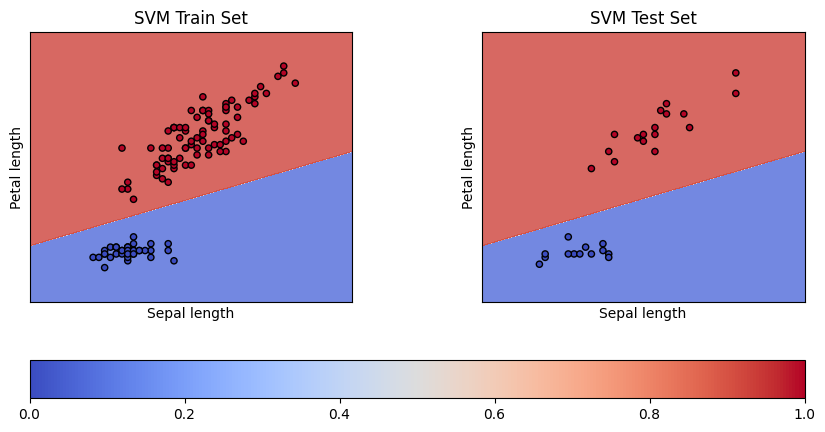

In [49]:
# Contour plot
fig, sub = plt.subplots(1, 2, figsize=(10, 5))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

titles = ['SVM Train Set', 'SVM Test Set']
datasets = [(X_train, y_train), (X_test, y_test)]

for (X_set, y_set), title, ax in zip(datasets, titles, sub.flatten()):
    plot_contours(ax, SVM, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    scatter = ax.scatter(X_set[:, 0], X_set[:, 1], c=y_set, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Petal length')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

fig.colorbar(scatter, ax=sub, orientation='horizontal')
plt.show()

### 03. Kernel PCA

직접 Linear PCA와 Kernel PCA의 차이를 시각화해서 살펴보도록 하겠습니다. 구현의 편의를 위해 여기서부턴 라이브러리가 지원하는 SVM을 사용합니다!

*03번 Section에서는 별도로 수정할 코드가 없습니다. 직접 실행해보고 결과를 확인해보세요!*

한가지 주의할 사항은 C 변수는 hyperparameter로, 해당 parameter를 잘 조정하여야 SVM의 성능을 높일 수 있다는 점입니다.

In [50]:
X = iris.data[:, :2]
y = iris.target

In [51]:
C = 1   # SVM의 regularization parameter

clf = svm.SVC(kernel="linear", C=C)
clf.fit(X,y)

y_pred = clf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 38, 12],
       [ 0, 15, 35]])

In [52]:
# LinearSVM
clf_linear = svm.LinearSVC(C=C, max_iter=1000)
clf_linear.fit(X, y)

y_pred = clf_linear.predict(X)
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 2, 30, 18],
       [ 0,  9, 41]])

*참고: LinearSVC와 SVC의 linear kernel을 사용하는 것은 loss function에 있어 약간의 차이가 존재한다고 합니다.*

In [53]:
# RBF KernelPCA
clf_rbf = svm.SVC(kernel='rbf', gamma=0.7, C=C, max_iter=1000)   # gamma: scale parameter
clf_rbf.fit(X, y)

y_pred = clf_rbf.predict(X)
confusion_matrix(y, y_pred)

array([[50,  0,  0],
       [ 0, 37, 13],
       [ 0, 13, 37]])

In [54]:
# Polynomial KernelPCA
clf_pol = svm.SVC(kernel='poly', degree=3, gamma='auto', C=C, max_iter=1000)
clf_pol.fit(X,y)

y_pred = clf_pol.predict(X)
confusion_matrix(y, y_pred)

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


array([[50,  0,  0],
       [ 0, 31, 19],
       [ 0, 13, 37]])

해당 결과들을 시각화하면 아래와 같습니다.

In [55]:
C = 1.0
models = (clf, clf_linear, clf_pol, clf_rbf)
models = (clf.fit(X, y) for clf in models)

# plot title 형성
titles = ('SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel')

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


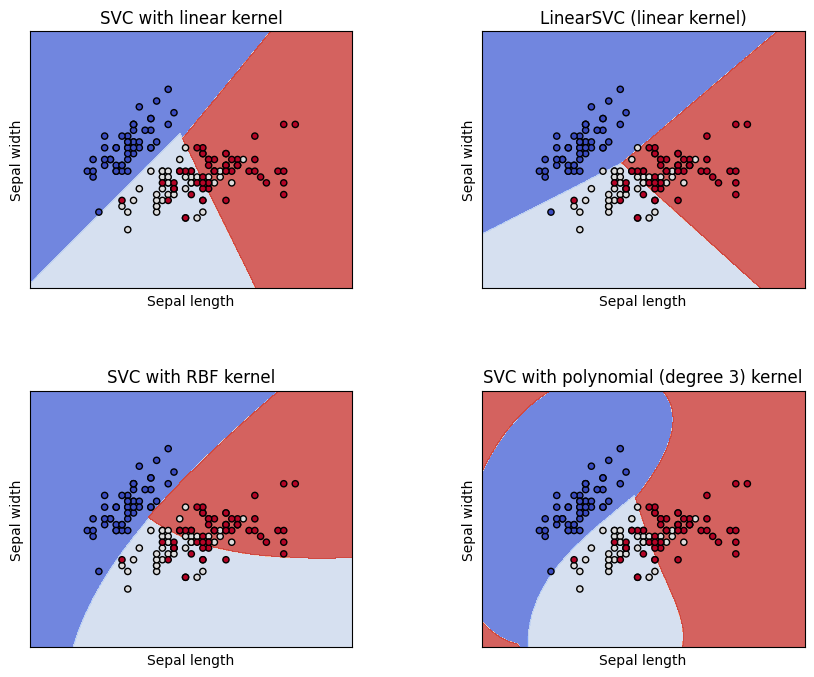

In [56]:
fig, sub = plt.subplots(2, 2, figsize=(10, 8))
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()